Libraries

In [3]:
import requests
import zipfile
import os
from os import path
import shutil
import pandas as pd
import chardet
import matplotlib.pyplot as plt
import numpy as np


#### Task 1: 
Go to observablehq.com and find ONE project. With the one project please enumerate the following:<br>
(a) please give the title, URL and description of the project on Observable,<br>
(b) describe the datasets used in the project (you can just provide 1 sentence summary of the dataset),<br>
(c) provide a brief description of the visualizations used (1 sentence),<br>
(d) describe why you found this dataset / project interesting (no more than 2 sentences).<br>

(40%) Perform basic data engineering<br>
#### Task 2: (Data Extraction, Selection and Transformation)


You will be downloading a large amount of data from FARS in preparation for analysis. For this part, you will create a Jupyter<br>
notebook, which will go to the FTP files of NHTSA.<br>
Your Python program / notebook must do the following:<br>
(1) fetch to your local file system every 5th year of data starting with 1975 to 2020. That is you will automate downloading<br>
the .zip files at the static FTP site and store it locally for 1975, 1980, 1985, … 2015 and 2020.<br>
(2) Once you have fetched the .zip files locally, you will then unzip them automatically to a folder corresponding to their<br>
year. Thus you will have 10 folders "./1975","./1980", … which will contain the contents of their correspoding .zip<br>
file from the NHTSA.<br>
(3) You will notice each of these folders contain many .csv files. You will create a folder at the same level as your notebook<br>
called accident_all_years and you will copy (not move), each of the yearly files (i.e. "1975/accident.csv") to the<br>
folder "accident_all_years/1975_accident.csv". The new folder will contain just the accident.csv files for<br>
all years downloaded.<br>
You will (minimally) need to study the following Python libraries to complete this task:<br>
• requests<br>
• zipfile<br>
• os<br>
You do not want to overthink this and use functions to perform the mundane automation of this assignment

##### File downloading methods

In [19]:
##create folder for downloads
#### NOTE: RUN THIS ONCE TO CREATE FOLDERS
os.makedirs("zip_downloads")
os.makedirs("extracted_folders")
os.makedirs("acceident_all_years")

zip_dest = "zip_downloads"
extracted_dest = "extracted_folders"



In [41]:
def fileExist(fileName):
    return path.exists(fileName)

In [43]:
## EXECUTE ONCE TO DOWNLOAD THE ZIP FILES
def download_zip_files(url,year):
    rq = requests.get(url)
    #zipName = url.split('/')[-1]
    zipName = zip_dest+"/"+str(year)+".zip"
    #we skip if file exist
    if fileExist(zipName):
        print(zipName+" Alread Exit Skipping Download!!!")
        return
    with open(zipName,'wb') as output_file:
        output_file.write(rq.content)
        
        
def download_multiple_files(from_year,skip,to_year):
   
    for year in range(from_year,(to_year+skip),skip): # we add skip, 5, to make sure we ge to the last year needed
        url = "https://static.nhtsa.gov/nhtsa/downloads/FARS/"+str(year)+"/National/FARS"+str(year)+"NationalCSV.zip"
        download_zip_files(url,year)
        
download_multiple_files(1975,5,2020)
        
    

##### Extraction of zip files

In [44]:
def unZipFile(zipName,year):
    zip_path = zip_dest+"/"+zipName
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        #create directory
        os.makedirs(extracted_dest+"/"+str(year)+"")
        zip_ref.extractall(extracted_dest+"/"+str(year)+"") ## destination folder is extracted_folders/year
        
def unZipMultipleFiles(from_year,to_year,skip):
    for year in range(from_year,(to_year+skip),skip):
        zipName = str(year)+".zip"
        unZipFile(zipName,year)
        
unZipMultipleFiles(1975,2020,5)        
    
    

#### copy files

In [45]:
def copyFile(src,dest):
    shutil.copyfile(src,dest)
    
def copyMultipleFiles(from_year,to_year,skip):
    for year in range(from_year,(to_year+skip),skip):
        src_path = extracted_dest+"/"+str(year)+"/"+"ACCIDENT.CSV"
        dest_path = "acceident_all_years/"+str(year)+"_"+"accident.csv"
        copyFile(src_path,dest_path)
    
copyMultipleFiles(1975,2020,5)    

#### Task: (Descriptive Statistics / Exploratory Data Analysis)

One of the first questions we might like to ask of the data, is about the number of fatalities, and then understand how many of
those fatalities involved a driver who was over the legal limit for alcohol consumption (keeping in mind that limit changes over
time).<br>
You will use your data from the first part to answer the following:<br>
(a) What is the overall number fatal accidents for the entire dataset period from 1975-2020? (Note: the denomenator is the
total number of accidents)<br>
(b) How many people died over that period? How many total people were involved (fatal and non-fatal)?<br>
(c) What proportion of accidents occurred between 9pm and 4am (overnight)?<br>
(d) What proportion of accidents occurred when the weather was snowy?<br>
(e) Build a line graph that shows the total fatalities by year (using the dataset with just every 5 years of data).<br>
(f) Make a general statement about what you observe in the line graph<br>

In [4]:
##list of data frames
data_frames = []

for y in range(1975,2025,5):
    with open("acceident_all_years/"+str(y)+"_accident.csv", 'rb') as f:
        enc = chardet.detect(f.readline())  # or readline if the file is large
        
    try:
        df = pd.read_csv("acceident_all_years/"+str(y)+"_accident.csv",encoding = enc['encoding'])
        data_frames.append(df)
    except:
        df = pd.read_csv("acceident_all_years/"+str(y)+"_accident.csv",encoding = 'latin1')
        data_frames.append(df)

In [5]:
data_frames[1]['DRUNK_DR']

0        0
1        0
2        1
3        0
4        1
        ..
45279    1
45280    1
45281    0
45282    1
45283    1
Name: DRUNK_DR, Length: 45284, dtype: int64

In [6]:
## (a) What is the overall number fatal accidents for the entire dataset period from 1975-2020?
## (Note: the denomenator is the total number of accidents)
print(list(data_frames[1].columns)) # all columns
total_accidents = 0
def find_total_fatals():
    total_fatals = 0
    total_persons = 0
    for df in data_frames:
        sum_fatals = df['FATALS'].count()
        sum_persons = df['PERSONS'].count()
        total_fatals = total_fatals + sum_fatals
        total_persons = total_persons + sum_persons
    
    return total_fatals,total_persons
         


['STATE', 'COUNTY', 'MONTH', 'DAY', 'YEAR', 'HOUR', 'MINUTE', 'VE_FORMS', 'PERSONS', 'VEHICLES', 'LAND_USE', 'CL_TWAY', 'ROAD_FNC', 'TA_1_CL', 'SP_JUR', 'HARM_EV', 'MAN_COLL', 'REL_JUNC', 'REL_ROAD', 'ROAD_FLO', 'NO_LANES', 'SP_LIMIT', 'ALIGNMNT', 'PROFILE', 'PAVE_TYP', 'SUR_COND', 'TRA_CONT', 'LGT_COND', 'WEATHER', 'HIT_RUN', 'C_M_ZONE', 'NOT_HOUR', 'NOT_MIN', 'ARR_HOUR', 'ARR_MIN', 'SCH_BUS', 'CF1', 'CF2', 'CF3', 'FATALS', 'DAY_WEEK', 'DRUNK_DR', 'ST_CASE', 'CITY', 'RAIL']


In [7]:
totals = find_total_fatals()   
print("Total Number of fatal accidents")
print(totals)
total_accidents = total_persons = totals[0]
print("Total Accidents ",total_accidents)

Total Number of fatal accidents
(376096, 376096)
Total Accidents  376096


(b) How many people died over that period? How many total people were involved (fatal and non-fatal)?

In [8]:

def find_died_fatals():
    total_fatals = 0
    total_persons = 0
    for df in data_frames:
        sum_fatals = df['FATALS'].sum()
        sum_persons = df['PERSONS'].sum()
        total_fatals = total_fatals + sum_fatals
        total_persons = total_persons + sum_persons
    print("People Involved ",total_persons)
    print("People Died",total_fatals)
find_died_fatals()    

People Involved  955696
People Died 418619


(c) What proportion of accidents occurred between 9pm and 4am (overnight)?

In [9]:
def find_BETWEEN_NINE_AND_4():
    total_= 0
    for df in data_frames:
        
        for v in df['HOUR']:
            if v >= 21 or  v  <= 4:
                total_ += 1
                
    
    print("Propotion = ",total_/total_accidents)
    
find_BETWEEN_NINE_AND_4()


Propotion =  0.3586025908278737


(d) What proportion of accidents occurred when the weather was snowy?

In [10]:
def find_accidents_snowy():
    total_= 0
    for df in data_frames:
        
        for v in df['WEATHER']:
            
            if v == 4:
                total_ += 1
                
    
    print("Propotion = ",total_/total_accidents)
    
find_accidents_snowy()


Propotion =  0.01634954905130605


(e) Build a line graph that shows the total fatalities by year (using the dataset with just every 5 years of data).

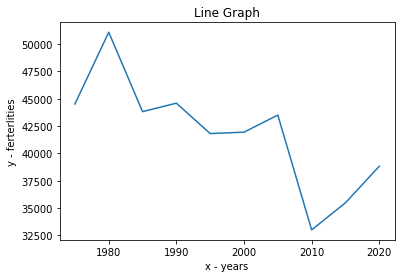

In [11]:
ferterlities = []
def find_fatals_by_year():
    for df in data_frames:
        sum_fatals = df['FATALS'].sum()
        ferterlities.append(sum_fatals)
find_fatals_by_year() 


years = []

for y in range(1975,2025,5):
    years.append(y)

x = years
# corresponding y axis values
y = ferterlities 
plt.plot(x, y)
plt.xlabel('x - years')
# naming the y axis
plt.ylabel('y - ferterlities')
# giving a title to my graph
plt.title('Line Graph')
# function to show the plot
plt.show()

(f) Make a general statement about what you observe in the line graph.

Accidents have been decreasing from 1980. However, beginning 2010 the number of accidents seem to rise

### Task: (Descriptive Statistics / Exploratory Data Analysis)

(a) From 1975-2020, what was the average (mean) rate of fatal accidents which involved an intoxicated driver? This would
be over all states.

In [16]:
def find_DRUNK_DR():
    total_= 0
    DRUNK_DR = 0
    for df in data_frames:
        for v in df['DRUNK_DR']:
            total_ += 1
            if v >= 1:
                DRUNK_DR += 1
                
    
    print("Mean = ",DRUNK_DR /total_)
find_DRUNK_DR()

Mean =  0.3314978090700247


b) In 1975 which 5 states had the highest rate of fatal accidents involving an intoxicated driver? Which 5 had the least?
Please list the states and the rates in a table in the notebook.

In [19]:

grouped_1975 = data_frames[0].groupby('STATE').mean().reset_index()
grouped_1975 = grouped_1975.sort_values('FATALS', ascending=False).head()
grouped_1975_HEAD = grouped_1975.sort_values('FATALS', ascending=False).head()
grouped_1975_tail = grouped_1975.sort_values('FATALS', ascending=False).tail()
print(grouped_1975['STATE'])
print(grouped_1975['FATALS'])


50    56
34    38
41    46
26    30
45    50
Name: STATE, dtype: int64
50    1.220930
34    1.218978
41    1.218750
26    1.207469
45    1.201681
Name: FATALS, dtype: float64


(c) By 1990, how much had the top and bottom 5 changed (if at all)?

In [22]:
grouped_1990 = data_frames[0].groupby('STATE').mean().reset_index()
grouped_1990_HEAD = grouped_1990.sort_values('FATALS', ascending=False).head()
L1 = list(grouped_1975_HEAD['FATALS'])

grouped_1990_TAIL = grouped_1990.sort_values('FATALS', ascending=False).tail()
L2 = list(grouped_1990_HEAD['FATALS'])



a1 = np.array(L1)
a2 = np.array(L2)
sub = np.subtract(a2, a1)
subtracted_1 = list(sub)
print(subtracted_1)


grouped_1990 = data_frames[1].groupby('STATE').mean().reset_index()
grouped_1990_HEAD = grouped_1990.sort_values('FATALS', ascending=False).head()
L1 = list(grouped_1975_HEAD['FATALS'])

grouped_1990_TAIL = grouped_1990.sort_values('FATALS', ascending=False).tail()
L2 = list(grouped_1990_HEAD['FATALS'])



a1 = np.array(L1)
a2 = np.array(L2)
sub = np.subtract(a2, a1)
subtracted_2 = list(sub)
print(subtracted_2)


[0.0, 0.0, 0.0, 0.0, 0.0]
[-0.008164275111330888, -0.00910155897990439, -0.023628048780487854, -0.026182329960447337, -0.02414444038484964]


e) Plot a graph with the top and bottom five states, showing just the rate over time (from 1975-2020). You can plot these in
two graphs (top 5 and bottom 5 do not have to be in the same graph).

In [75]:
fv_top_states = list(data_frames[0].sort_values(by=['STATE'],ascending=False).head()['STATE'])
fv_bottom_states = list(data_frames[0].sort_values(by=['STATE'],ascending=False).tail()['STATE'])


top_records_1 = []
top_records_2 = []
top_records_3 = []
top_records_4 = []
top_records_5 = []


for df in data_frames:
    count = 0
    for v in df["STATE"]:
        if v == fv_top_states[0]:
            top_records_1.append(df["FATALS"][count])
        if v == fv_top_states[1]:
            top_records_2.append(df["FATALS"][count])
        if v == fv_top_states[2]:
            top_records_3.append(df["FATALS"][count])
        if v == fv_top_states[3]:
            top_records_4.append(df["FATALS"][count])
        if v == fv_top_states[4]:
            top_records_5.append(df["FATALS"][count])
        count += 1
            

        

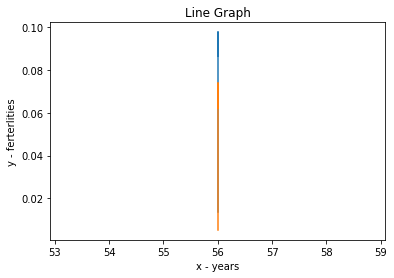

In [97]:
x = fv_top_states
# corresponding y axis values
y = subtracted_1
plt.plot(x, y)

y = subtracted_2
plt.plot(x, y)
plt.xlabel('x - years')
# naming the y axis
plt.ylabel('y - ferterlities')
# giving a title to my graph
plt.title('Line Graph')
# function to show the plot
plt.show()

(f) What is your interpretation of the trend – pretend you have no knowledge about the changes in law, changes in BAC
thresholds or changes in public messaging about DUIs.

The number of accidents increases from year 1975 omwords